<a href="https://colab.research.google.com/github/Lee-fang-yu/House-Prices-Advanced-Regression-Techniques/blob/master/Final_project_by_%E6%9D%8E%E8%8A%B3%E5%A6%A4_%E8%98%87%E9%BA%9F%E9%9B%AF_%E6%B2%88%E5%BE%B7%E5%A8%81_%E9%AB%98%E5%81%89%E5%BA%AD_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **讀取原始資料**

In [ ]:
dff = pd.read_csv('test.csv', index_col=0)

In [ ]:
df = pd.read_csv('train.csv', index_col=0)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
#df.head(10)
#dff.head(10)

#**NAN處理**
## **df : train.csv僅處理掉NAN**
## **dff : test.csv僅處理掉NAN**
NaN處理方式為
超過3%以上整欄去除,低於3%的NaN用上一欄的值來補


In [ ]:
def one_hot_incode(feature):
  labelencoder = LabelEncoder()
  data = labelencoder.fit_transform(df[feature])
  return data

num = df.isna().sum()
j=-1
for i in num:
  j=j+1
  if i > 35:
    #print(i)
    #print(num.index[j]) 
    df = df.drop(labels=num.index[j], axis='columns')
    # print(num.index[j])
  else:
    df = df.fillna(axis=0,method='ffill') #nan先用上面的補

print(df)

num_2 = dff.isna().sum()
h=-1
for u in num_2:
  h=h+1
  if u > 35:
    #print(i)
    #print(num_2.index[j]) 
    dff = dff.drop(labels=num_2.index[h], axis='columns')
    # print(num_2.index[j])
  else:
    dff = dff.fillna(axis=0,method='ffill') #nan先用上面的補

print(dff)

      MSSubClass MSZoning  LotArea  ... SaleType SaleCondition SalePrice
Id                                  ...                                 
1             60       RL     8450  ...       WD        Normal    208500
2             20       RL     9600  ...       WD        Normal    181500
3             60       RL    11250  ...       WD        Normal    223500
4             70       RL     9550  ...       WD       Abnorml    140000
5             60       RL    14260  ...       WD        Normal    250000
...          ...      ...      ...  ...      ...           ...       ...
1456          60       RL     7917  ...       WD        Normal    175000
1457          20       RL    13175  ...       WD        Normal    210000
1458          70       RL     9042  ...       WD        Normal    266500
1459          20       RL     9717  ...       WD        Normal    142125
1460          20       RL     9937  ...       WD        Normal    147500

[1460 rows x 64 columns]
      MSSubClass MSZoning

In [ ]:
#df

#**全數字的Data**
## **df_num_only: 是只有數字的data**
為了等下將英文轉數字,先行將數字部分獨立出來

In [ ]:
non_num_2 = []
for col in dff:
    if dff[col].dtypes not in ["float64", "int64"] :
        non_num_2.append(col)
dff_num_only = dff.drop(columns=non_num_2)

In [ ]:
non_num = []
for col in df:
    if df[col].dtypes not in ["float64", "int64"] :
        non_num.append(col)
df_num_only = df.drop(columns=non_num)

In [ ]:
df_num_only

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,175000
1457,20,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,210000
1458,70,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,266500


#**英文轉數字**
## **new_df : df中去掉數字的資料後，剩下內容為英文的資料，並將它們轉為數字**
## **new_dff : dff中去掉數字的資料後，剩下內容為英文的資料，並將它們轉為數字** 
主要使用 one hot incoding及迴圈的方式來將英文轉成數字

In [ ]:
new_dff = dff.drop(labels=['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'],axis='columns')
def one_hot_incode(feature):
  labelencoder = LabelEncoder()
  data_2 = labelencoder.fit_transform(dff[feature])
  return data_2

column_name_2 = list(new_dff.columns)

for m in range(len(column_name_2)):
    new_dff[column_name_2[m]] = one_hot_incode(column_name_2[m])

print(new_dff)

      MSZoning  Street  LotShape  ...  PavedDrive  SaleType  SaleCondition
Id                                ...                                     
1461         2       1         3  ...           2         8              4
1462         3       1         0  ...           2         8              4
1463         3       1         0  ...           2         8              4
1464         3       1         0  ...           2         8              4
1465         3       1         0  ...           2         8              4
...        ...     ...       ...  ...         ...       ...            ...
2915         4       1         3  ...           2         8              4
2916         4       1         3  ...           2         8              0
2917         3       1         3  ...           2         8              0
2918         3       1         3  ...           2         8              4
2919         3       1         3  ...           2         8              4

[1459 rows x 43 columns]

In [ ]:
new_df = df.drop(labels=['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                     'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
                      'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                     'GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold','YrSold','SalePrice'],axis='columns')

def one_hot_incode(feature):
  labelencoder = LabelEncoder()
  data = labelencoder.fit_transform(df[feature])
  return data

column_name = list(new_df.columns)

for i in range(len(column_name)):
    #print(i)
    new_df[column_name[i]] = one_hot_incode(column_name[i])

print(new_df)

      MSZoning  Street  LotShape  ...  PavedDrive  SaleType  SaleCondition
Id                                ...                                     
1            3       1         3  ...           2         8              4
2            3       1         3  ...           2         8              4
3            3       1         0  ...           2         8              4
4            3       1         0  ...           2         8              0
5            3       1         0  ...           2         8              4
...        ...     ...       ...  ...         ...       ...            ...
1456         3       1         3  ...           2         8              4
1457         3       1         3  ...           2         8              4
1458         3       1         3  ...           2         8              4
1459         3       1         3  ...           2         8              4
1460         3       1         3  ...           2         8              4

[1460 rows x 29 columns]

In [ ]:
#new_df

#**合併new_df(new_df)與df_num_only(dff_num_only)為final_df(final_dff)**

In [ ]:
final_dff=pd.concat([dff_num_only, new_dff],axis=1)
print(final_dff)

      MSSubClass  LotArea  OverallQual  ...  PavedDrive  SaleType  SaleCondition
Id                                      ...                                     
1461          20    11622            5  ...           2         8              4
1462          20    14267            6  ...           2         8              4
1463          60    13830            5  ...           2         8              4
1464          60     9978            6  ...           2         8              4
1465         120     5005            8  ...           2         8              4
...          ...      ...          ...  ...         ...       ...            ...
2915         160     1936            4  ...           2         8              4
2916         160     1894            4  ...           2         8              0
2917          20    20000            5  ...           2         8              0
2918          85    10441            5  ...           2         8              4
2919          60     9627   

In [ ]:
final_df=pd.concat([df_num_only, new_df],axis=1)
print(final_df)

      MSSubClass  LotArea  OverallQual  ...  PavedDrive  SaleType  SaleCondition
Id                                      ...                                     
1             60     8450            7  ...           2         8              4
2             20     9600            6  ...           2         8              4
3             60    11250            7  ...           2         8              4
4             70     9550            7  ...           2         8              0
5             60    14260            8  ...           2         8              4
...          ...      ...          ...  ...         ...       ...            ...
1456          60     7917            6  ...           2         8              4
1457          20    13175            6  ...           2         8              4
1458          70     9042            7  ...           2         8              4
1459          20     9717            5  ...           2         8              4
1460          20     9937   

In [ ]:
#final_df['SalePrice']

#**畫關係圖**

## **SalePrice之關係圖**

In [ ]:
#SalePrice Statistics
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

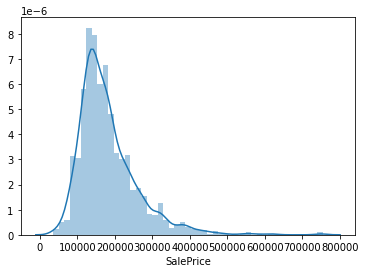

In [ ]:
#Histogram of 'SalePrice'
sns.distplot(df['SalePrice']);

# **df的相關矩陣**

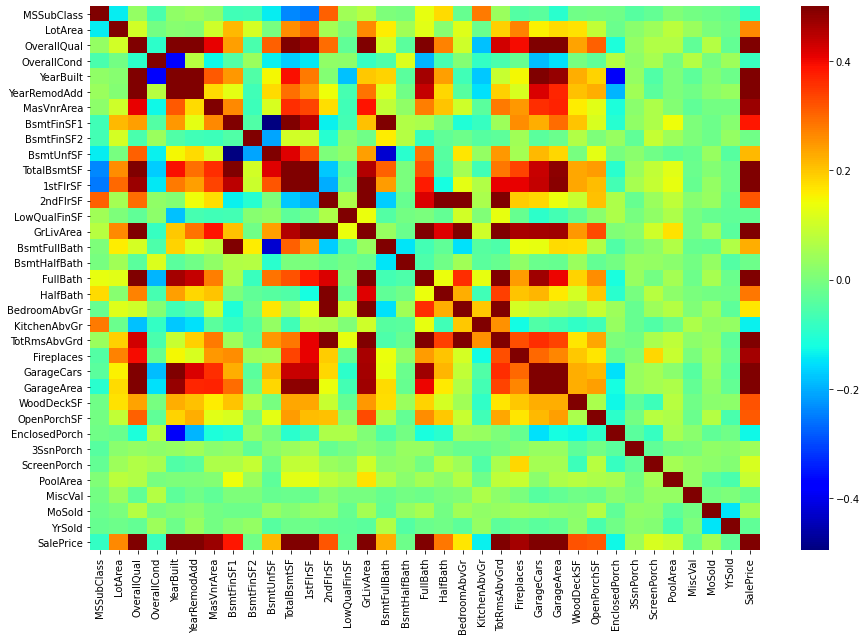

In [ ]:
#Correlation matrix of df
corr_mat2=df.corr()
plt.subplots(figsize=(15, 10))
sns.heatmap(corr_mat2, vmax=.5, cmap="jet");

## **上述的熱能圖必呈對稱，所以我從上三角矩陣中選出與SalePrice的相關程度>0.75的出來**

In [ ]:
#The above heatmap (corr_mat2) must be symmetric so i choose variables whose relativity is bigger than 0.75 from the upper triangular matrix (heatmap)
upper_trian=corr_mat2.where(np.triu(np.ones(corr_mat2.shape),k=0).astype(np.bool))
high_relation=[column for column in upper_trian.columns if any (upper_trian[column]>=0.75)]
print(high_relation)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


# **Corr_mat2中內容與SalePrice的相關矩陣**

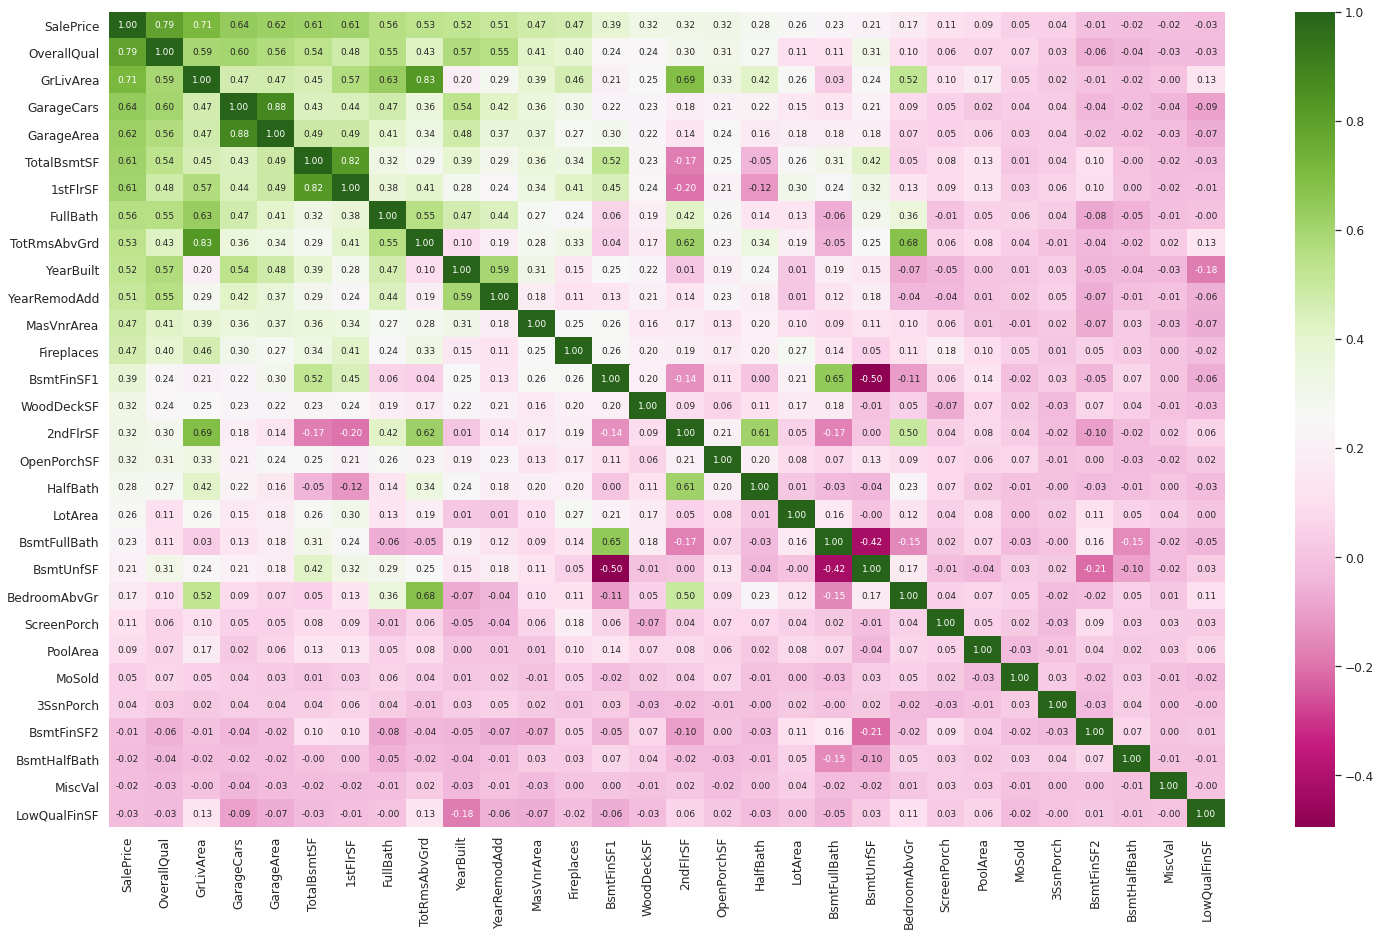

In [ ]:
#SalePrice correlation matrix of corr_mat2
k = 30 #number of variables 
plt.figure(figsize = (25,15))
cols = corr_mat2.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
#label's size
sns.set(font_scale=1.1)
hm = sns.heatmap(cm,cmap='PiYG', annot=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# **final_df的相關矩陣**
##### **透過觀察，可以得知'OverallQual','GrLivArea','TotalBsmtSF','YearBuilt','Fireplaces','GarageArea','MasVnrArea'與'SalePrice'最為相關**

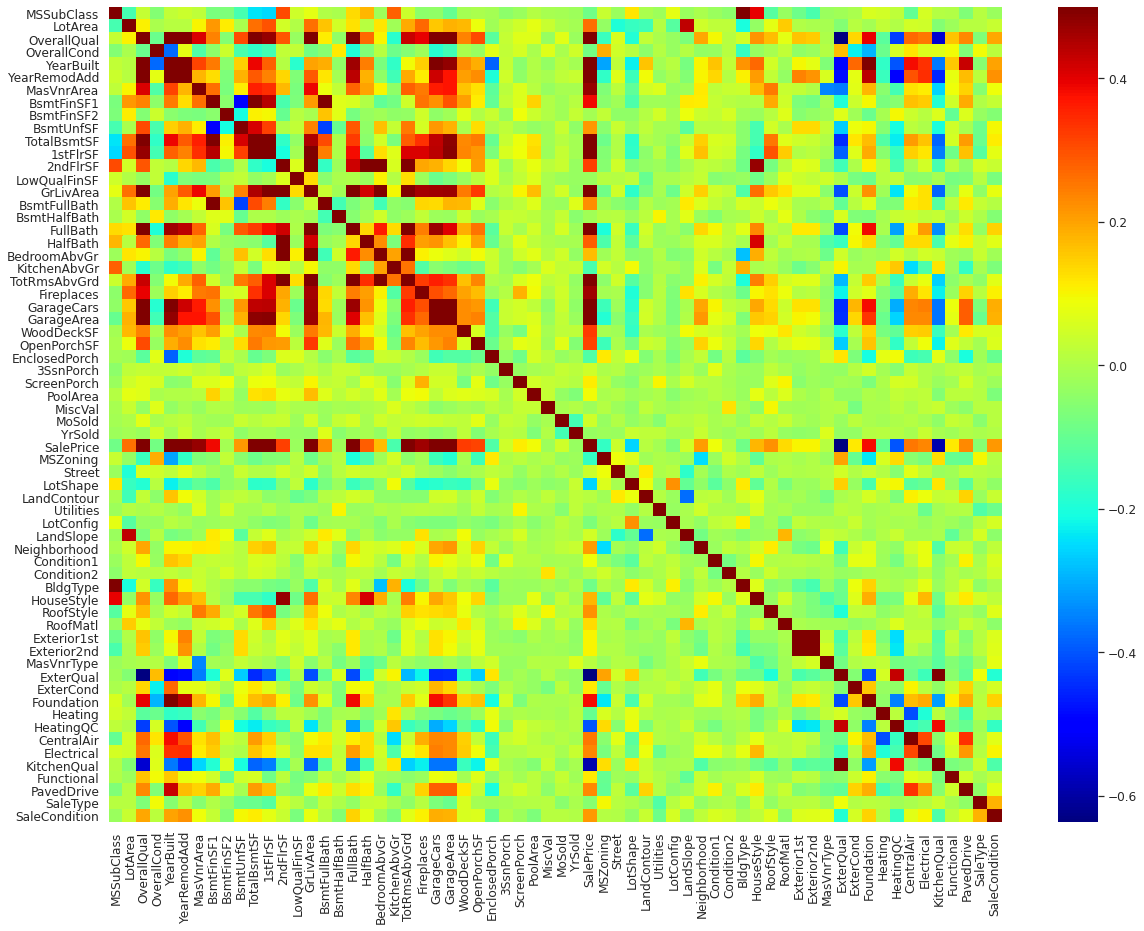

In [ ]:
#Correlation matrix of final_df
corr_mat=final_df.corr()
plt.subplots(figsize=(20, 15))
sns.heatmap(corr_mat, vmax=.5, cmap="jet");

### **'OverallQual','GrLivArea','TotalBsmtSF','YearBuilt','Fireplaces','GarageArea','MasVnrArea'與'SalePrice'的相關矩陣**
##### **由於透過觀察，可以得知'OverallQual','GrLivArea','TotalBsmtSF','YearBuilt','Fireplaces','GarageArea','MasVnrArea'與'SalePrice'最為相關**

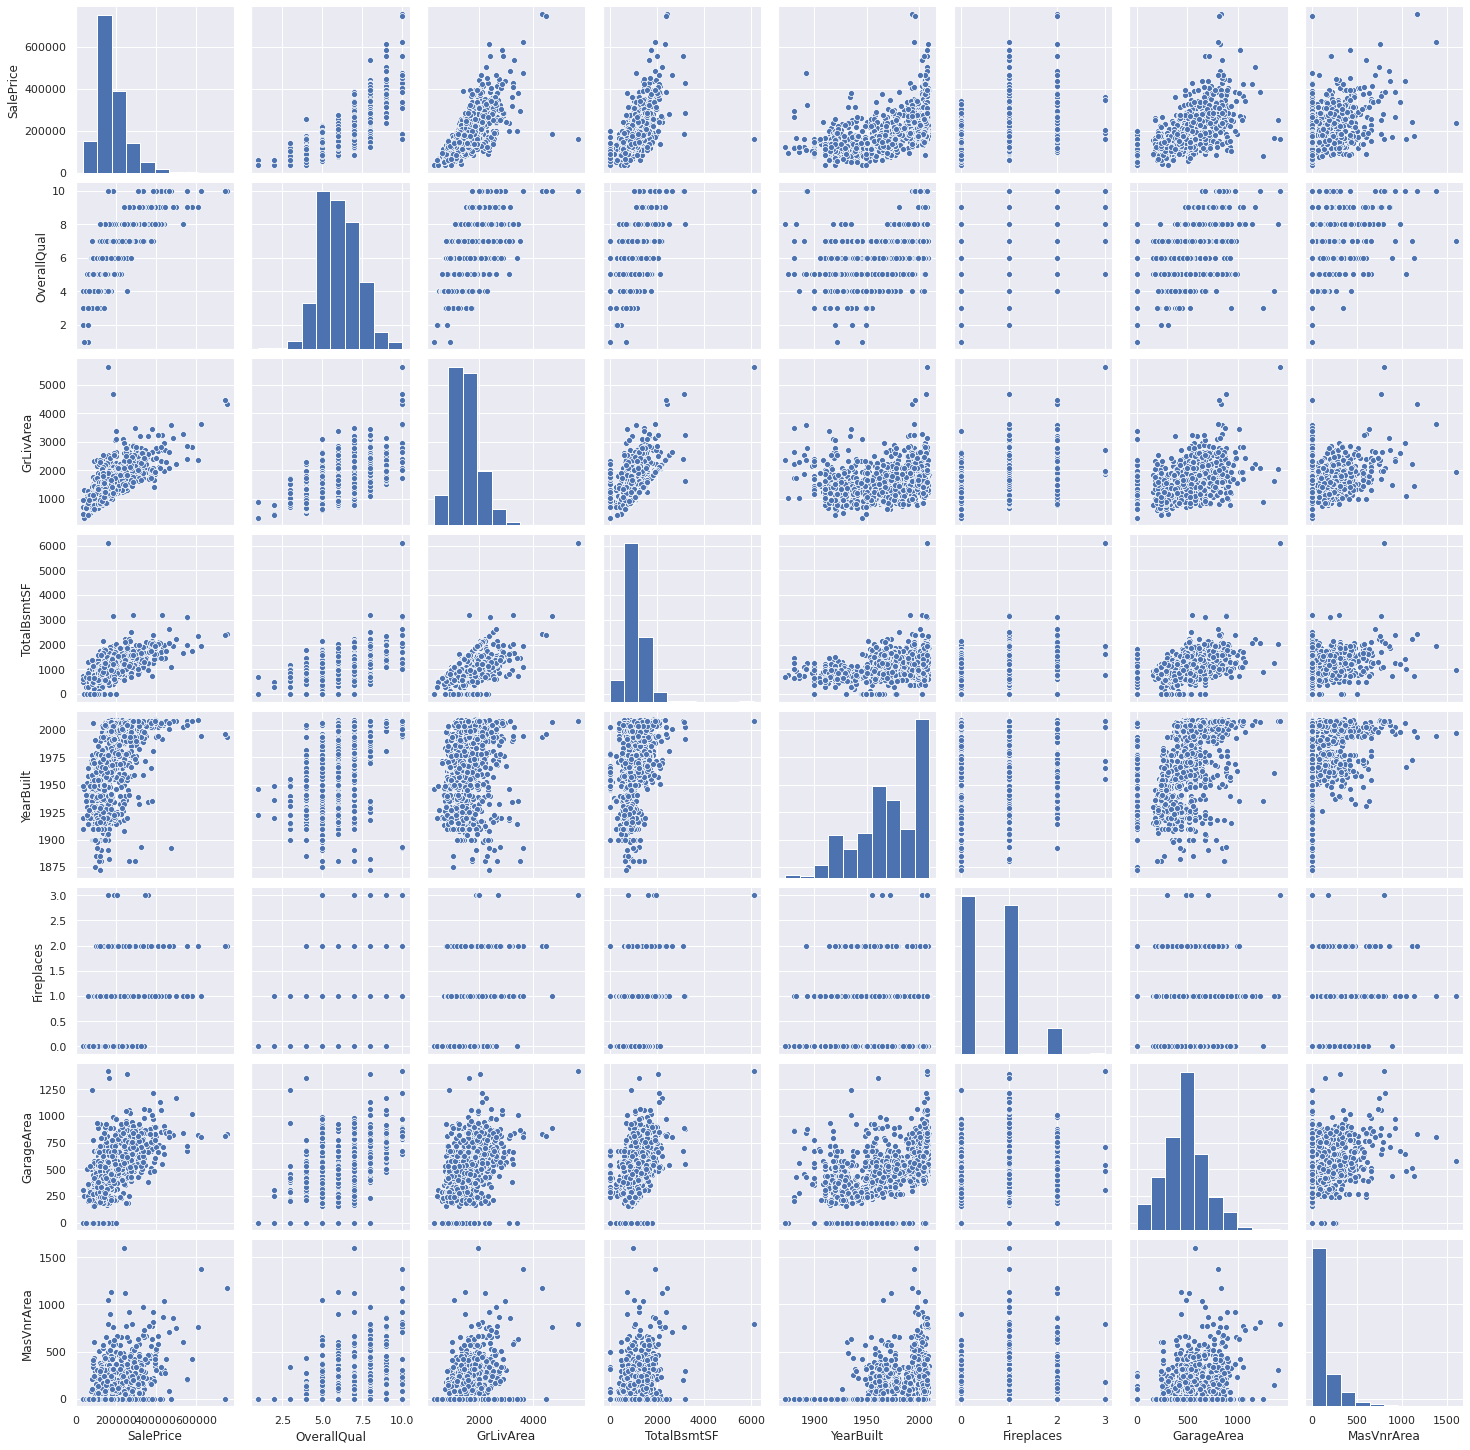

In [ ]:
#scatterplot of final_df
sns.set()
cols = ['SalePrice', 'OverallQual','GrLivArea','TotalBsmtSF','YearBuilt','Fireplaces','GarageArea','MasVnrArea']
sns.pairplot(df[cols],palette="husl")

# **刪除離群值**
https://imgur.com/JREbD3e <br>
這裡觀察較為重要的幾個feature <br>
注意到上圖圈起來的幾個點，明顯偏離主群體，故這裡刪除這三個資料點

In [ ]:
drop_pts_Id = df.sort_values(by = 'GrLivArea', ascending= False)[:2]['GrLivArea'].index.tolist()
drop_pts_Id = drop_pts_Id + df.sort_values(by = 'TotalBsmtSF', ascending= False)[:1]['TotalBsmtSF'].index.tolist()
drop_pts_Id


[1299, 524, 1299]

這裡發現三個點中其實有個點是重複的，所以只會刪除兩個點

In [ ]:
df_deleted_outliears = df.drop(drop_pts_Id)
df_deleted_outliears

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,0,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,2,460,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,790,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,2,500,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,275,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,1,252,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500


# **畫出刪除離群值之後的資料的相關圖**

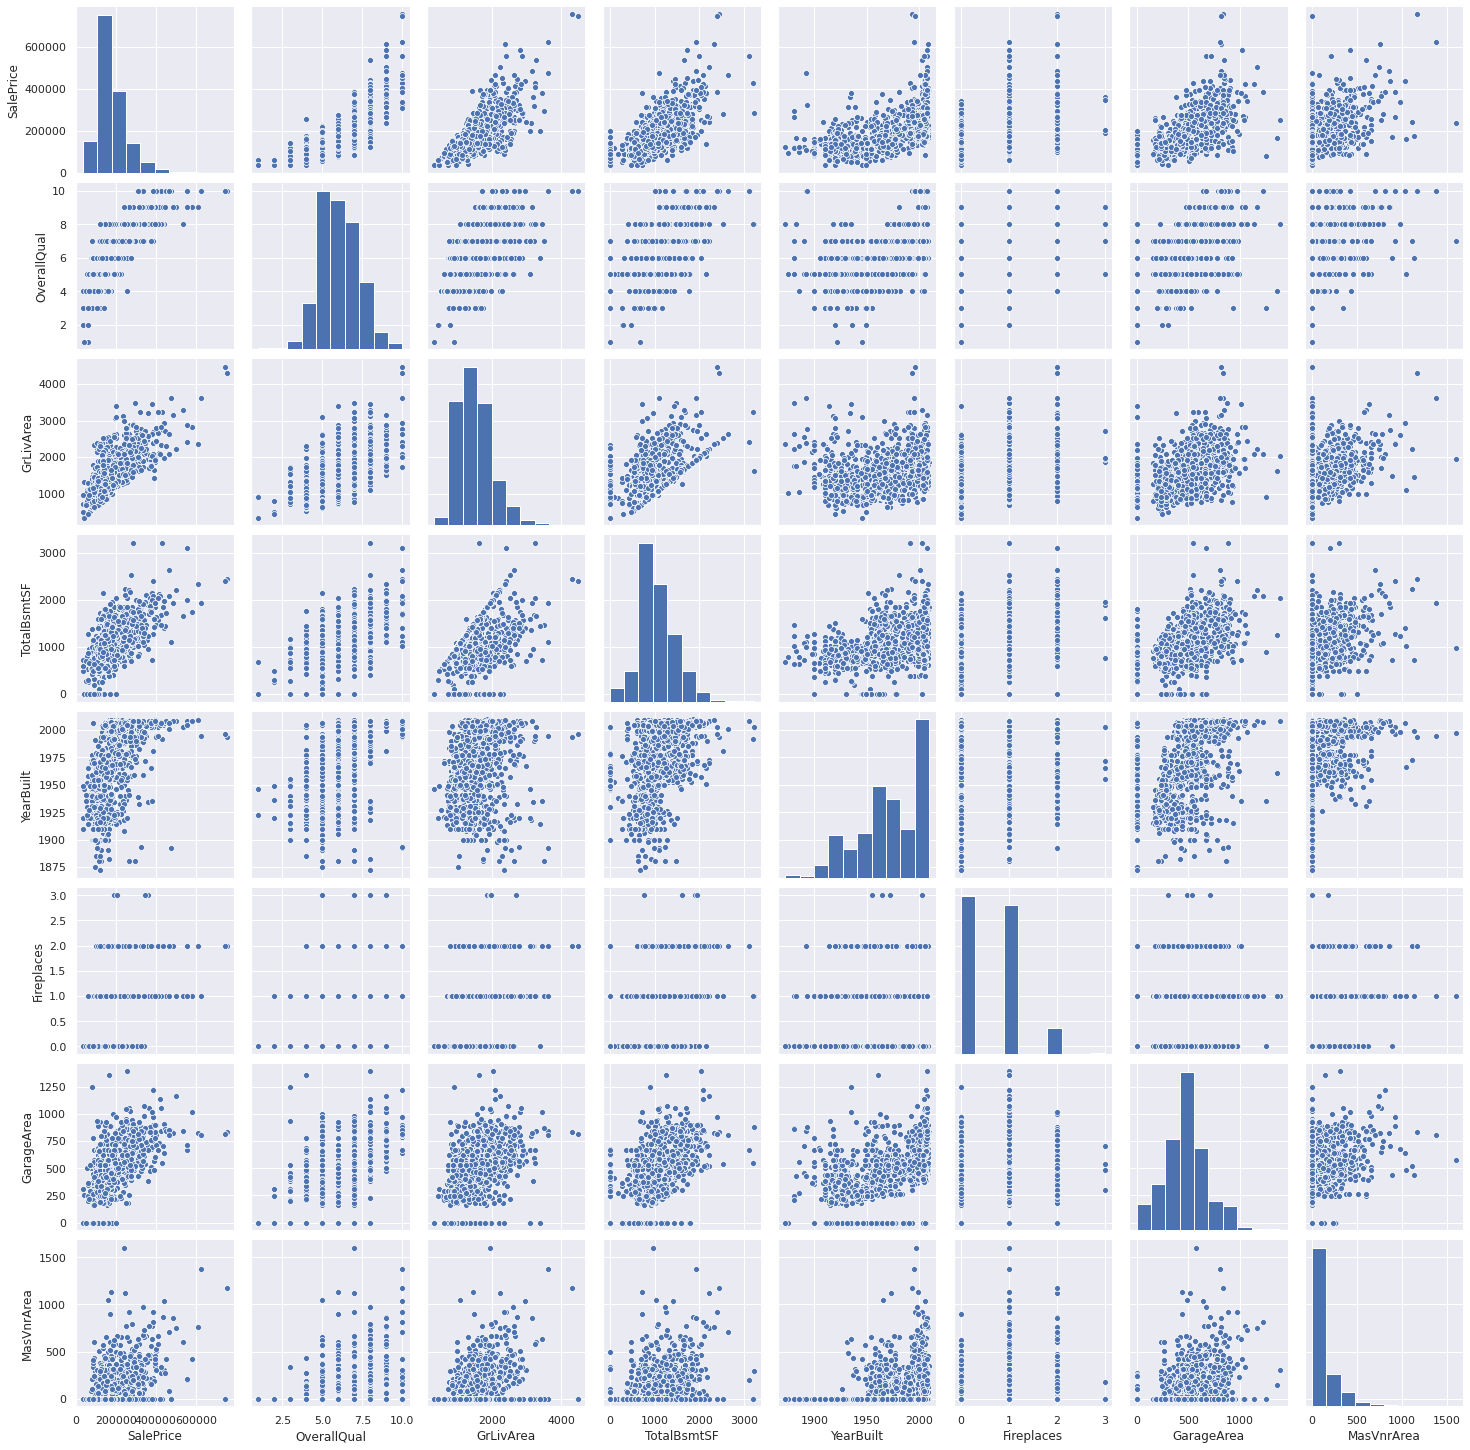

In [ ]:
#scatterplot of df_deleted_outliears
sns.set()
cols = ['SalePrice', 'OverallQual','GrLivArea','TotalBsmtSF','YearBuilt','Fireplaces','GarageArea','MasVnrArea']
sns.pairplot(df_deleted_outliears[cols],palette="husl")

# **Final_df產生**

In [ ]:
final_df = final_df.drop(drop_pts_Id)

# **將訓練集與測試集分開，分為X_train, X_test, y_train, y_test**

In [ ]:
train=final_df
#print(train)

In [ ]:
#final_df['SalePrice']

In [ ]:
test=final_dff
#print(test)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.drop('SalePrice', axis=1), final_df['SalePrice'], test_size=0.3, random_state=101)

# **X_train排除了'Saleprice'**

In [ ]:
X_train

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7,20,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2,636,255,57,0,0,0,0,0,8,2007,3,1,3,3,0,4,0,21,2,2,0,2,1,1,12,13,3,2,4,2,1,0,1,4,2,6,2,8,4
1363,50,12513,4,4,1920,2007,0.0,0,0,715,715,1281,457,0,1738,0,0,2,0,4,1,7,1,1,368,55,0,0,0,0,0,0,6,2009,3,1,0,3,0,2,0,12,1,2,0,0,1,1,12,13,2,3,2,0,1,2,1,4,3,6,2,8,4
1441,70,11526,6,7,1922,1994,0.0,0,0,588,588,1423,748,384,2555,0,0,2,0,3,1,11,1,2,672,431,0,0,0,0,0,0,9,2008,3,1,0,0,0,4,1,6,2,2,0,3,1,1,8,8,2,3,4,0,1,1,1,4,3,2,2,8,4
268,75,8400,5,8,1939,1997,0.0,378,0,342,720,1052,720,420,2192,0,0,2,1,4,1,8,1,1,240,262,24,0,0,0,0,0,7,2008,3,1,3,0,0,4,1,18,2,2,0,3,1,1,13,14,2,3,4,2,1,0,1,4,2,6,2,8,4
347,20,12772,6,8,1960,1998,0.0,498,0,460,958,958,0,0,958,0,0,1,0,2,1,5,0,1,301,0,0,0,0,0,0,15500,4,2007,3,1,0,3,0,1,0,12,2,2,0,2,3,1,8,8,2,3,2,1,1,4,1,4,3,6,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1420,20,16381,6,5,1969,1969,312.0,1110,0,734,1844,1844,0,0,1844,1,0,2,0,3,1,7,1,2,540,0,73,216,0,0,0,0,12,2006,3,1,0,3,0,4,0,6,2,2,0,2,1,1,9,10,1,2,2,1,1,2,1,4,2,6,2,8,4
76,180,1596,4,5,1973,1973,0.0,462,0,0,462,526,462,0,988,1,0,1,0,2,1,5,0,1,297,120,101,0,0,0,0,0,11,2009,4,1,3,3,0,4,0,10,2,2,3,7,1,1,5,5,2,3,4,1,1,4,1,4,3,6,2,8,4
601,60,10927,8,5,2005,2005,280.0,546,0,512,1058,1058,846,0,1904,1,0,2,1,3,1,8,1,2,736,179,60,0,0,0,0,0,6,2006,3,1,3,3,0,4,0,16,2,2,0,5,1,1,12,13,1,2,4,2,1,0,1,4,0,6,2,8,4


# **y_train 為只有'Saleprice'資料**

In [ ]:
y_train

Id
7       307000
1363    104900
1441    191000
268     179500
347     151500
         ...  
1420    223000
76       91000
601     275000
1364    156932
865     250580
Name: SalePrice, Length: 1020, dtype: int64

# **模擬**

In [ ]:
'''
## scale to data (optional)
#y_train= y_train.values.reshape(-1,1)
#y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sts_X = StandardScaler()
#sts_y = StandardScaler()
X_train = sts_X.fit_transform(X_train)
X_test = sts_X.fit_transform(X_test)
#y_train = sts_y.fit_transform(y_train)
#y_test = sts_y.fit_transform(y_test)
'''

'\n## scale to data (optional)\n#y_train= y_train.values.reshape(-1,1)\n#y_test= y_test.values.reshape(-1,1)\n\nfrom sklearn.preprocessing import StandardScaler\nsts_X = StandardScaler()\n#sts_y = StandardScaler()\nX_train = sts_X.fit_transform(X_train)\nX_test = sts_X.fit_transform(X_test)\n#y_train = sts_y.fit_transform(y_train)\n#y_test = sts_y.fit_transform(y_test)\n'

# **使用DecisionTreeRegressor**


# **Decision Tree Regressor introduction**
#### **．Decision Tree為supervised learning，在訓練模型階段，會先將所有與問題定義域相關的歷史資料以及問題的正確值拉進來，讓模型學習到他們之間的關聯性，以訓練模型。**
#### **．值得一提的是，Decision Tree可以用在regression也可以用在classification。而當用於regression時，Decision Tree會使用MSE去決定如何將一個節點拆分為兩個或更多子節點。**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_dc = DecisionTreeRegressor(random_state = 100, max_depth=8)
s=model_dc.fit(X_train, y_train)
print(s)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')


In [ ]:
prediction_dc=model_dc.predict(X_test)
print(prediction_dc)

[223866.66666667 138680.         129382.18181818 148413.56896552
 109407.14285714 148413.56896552 277000.         174263.34146341
 168670.52941176 150816.66666667 251472.08571429 184115.
 221956.11111111 200481.81818182 110611.42307692 174263.34146341
 143000.         158111.11111111 272650.         116264.85
 110611.42307692 402000.         174263.34146341 197288.4
 221956.11111111  82550.         139710.         109407.14285714
 200481.81818182 116264.85       168670.52941176 251472.08571429
 239686.         218300.         197288.4        148413.56896552
 326450.         131003.33333333 175385.71428571 197288.4
 328248.63636364 221956.11111111 109407.14285714 223726.71428571
 174263.34146341 123333.33333333 110611.42307692 116264.85
 131003.33333333  82550.         197288.4        148413.56896552
 135629.71698113 218300.         174263.34146341 168670.52941176
 165152.85714286 126875.13235294 146000.         148413.56896552
  82550.         223866.66666667 109407.14285714 281523.
 1

### **得到他們的MAE、MSE、RMSE**

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_dc))
print('MSE:', metrics.mean_squared_error(y_test,prediction_dc))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,prediction_dc)))

MAE: 25592.831931324676
MSE: 1491419818.2122698
RMSE: 38618.90493284694


Text(0, 0.5, 'Prediction_dc')

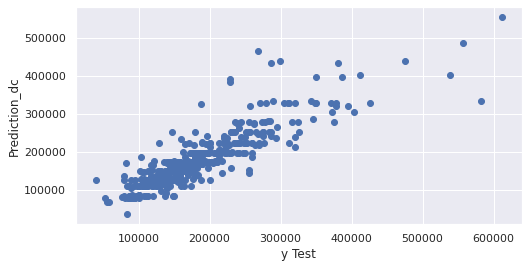

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test,prediction_dc,c='b')
plt.xlabel('y Test')
plt.ylabel('Prediction_dc')

### **得到Decision tree regressor的model score**

In [ ]:
model_dc.score(X_test, y_test)

0.7578062329919136

# **把重複的columns刪除**

In [ ]:
test_run = test.loc[:,~test.columns.duplicated()]

In [ ]:
#test_run 

In [ ]:
result = model_dc.predict(test_run)

In [ ]:
result

array([116264.85      , 150816.66666667, 145535.5862069 , ...,
       148413.56896552, 116264.85      , 221956.11111111])

In [ ]:
my_sub4 = pd.DataFrame({'Id': dff.index, 'SalePrice': result})
my_sub4

,Id,SalePrice
0,1461,116264.850000
1,1462,150816.666667
2,1463,145535.586207
3,1464,174263.341463
4,1465,197250.000000
...,...,...
1454,2915,82550.000000
1455,2916,82550.000000
1456,2917,148413.568966
1457,2918,116264.850000


In [ ]:
my_sub4.to_csv(r'my_sub4.csv', index=False)


# Public Score = 0.19694 <br />


#**．XGBRegressor Introduction**
####**．XGBRegressor全名為eXtreme Gradient Boosting Regressor (極限梯度提升迴歸器)**
####**．是boosting算法的其中一種。Boosting算法的思想是將許多弱分類器集成在一起形成一個強分類器。也就是說，XGBoost是一種提升樹模型，是將許多樹模型集成在一起，形成一個很強的分類器。**
####**．是decision tree 的強化版。**
####**．有兩種防止overfitting的方法：Shrinkage and Column Subsampling。**
#####**Shrinkage(收縮)：在每次疊代中對樹的每個葉子結點的分數乘上一個縮減權重η，這可以使得每一棵樹的影響力不會太大，留下更大的空間給後面生成的樹去優化模型。通常這個方法效果較好。**
#####**Column Subsampling(二次抽樣)：類似於random forest中的選取部分特徵進行建樹。可分為兩種，一種是按層隨機採樣，在對同一層內每個結點分裂之前，先隨機選擇一部分特徵，然後只需要遍歷這部分的特徵，來確定最優的分割點。另一種是隨機選擇特徵，則建樹前隨機選擇一部分特徵然後分裂就只遍歷這些特徵。**


# **使用 XGBRegressor**




In [ ]:
import xgboost

In [ ]:
model_xgb = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=87)

In [ ]:
model_xgb.fit(X_train, y_train)

[13:18:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=87, silent=None, subsample=0.6,
             verbosity=1)

In [ ]:
model_xgb.score(X_test, y_test)

0.9051011662824858

In [ ]:
result2 = model_xgb.predict(test_run)

In [ ]:
result2

array([126948.01, 158598.48, 180833.55, ..., 164529.11, 119510.33,
       242138.69], dtype=float32)

In [ ]:
my_sub_xgb = pd.DataFrame({'Id': dff.index, 'SalePrice': result2})
my_sub_xgb

,Id,SalePrice
0,1461,126948.007812
1,1462,158598.484375
2,1463,180833.546875
3,1464,191719.703125
4,1465,187542.281250
...,...,...
1454,2915,84008.429688
1455,2916,78655.796875
1456,2917,164529.109375
1457,2918,119510.328125


In [ ]:
my_sub_xgb.to_csv(r'my_sub_xgb.csv', index=False)


# Public Score = 0.13182 <br />


In [ ]:
model_xgb2 = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=87)

In [ ]:
model_xgb2.fit(final_df.drop('SalePrice', axis=1), final_df['SalePrice']) # fit with all data

[13:19:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=4, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=87, silent=None, subsample=0.6,
             verbosity=1)

In [ ]:
result3 = model_xgb2.predict(test_run)
my_sub_xgb2 = pd.DataFrame({'Id': dff.index, 'SalePrice': result3})
my_sub_xgb2

,Id,SalePrice
0,1461,126930.320312
1,1462,164265.156250
2,1463,186406.015625
3,1464,192243.078125
4,1465,182519.531250
...,...,...
1454,2915,76268.609375
1455,2916,87743.109375
1456,2917,173823.625000
1457,2918,124837.320312


In [ ]:
my_sub_xgb2.to_csv(r'my_sub_xgb2.csv', index=False)

# Public Score = 0.13659 <br />
use XGBRegressor() with all data

(just overfitting)

# **．Comparing the model score**
# **(The higher, the better; maximum value=1)**
####**Decision tree regressor:0.7578062329919136**
####**XGBRegressor:0.9051011662824858**
# **．Comparing the score on Kaggle**
# **(The less, the better; minimum value=0.00)**
####**Decision tree regressor:0.19694**
####**XGBRegressor:0.13182**
---
### **剛剛提到，因為XGBRegressor這個分類器是Decision tree regressor的加強版。所以結果也很符合預期，不管是model score還是在Kaggle上的成績，XGBRegressor的表現比Decision tree regressor來得好。**